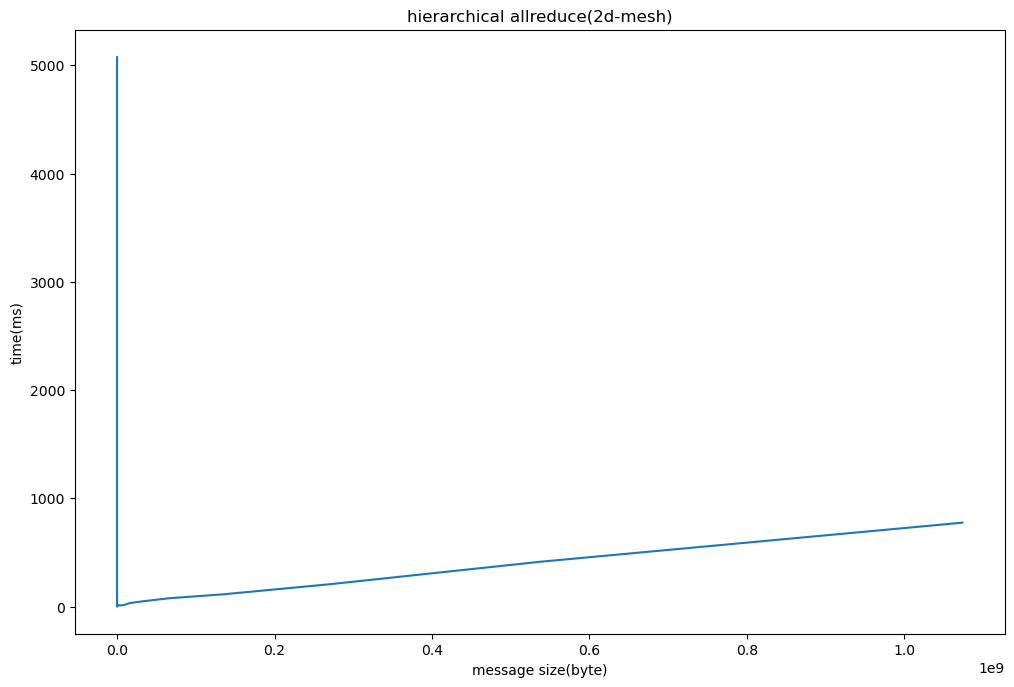

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def read_hvd(filename, arrlen=29):
    
    with open(filename, 'r') as f:
        content = f.read()

    arr = content.split(",")
    arr = arr[:-1]
    
    resultlen = len(arr)/arrlen
    
    result = {}
    y = []
    for i in range(arrlen):
        result[i] = 0

    for i in range(len(arr)):
        j = i % arrlen
        result[j] += float(arr[i])

    for i in range(arrlen):
        result[i] /= resultlen
        y.append(result[i])
    
    # 32-bit floating number is 4 byte
    x = [2**i *4 for i in range(arrlen)]
    
    return x, y

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
x, y = read_hvd("./data/horovod-results/15gpu/10g-15gpu-2dmesh.txt")
plt.plot(x,y)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reducescatter+mpi_allreduce+mpi_allgather
plt.title('hierarchical allreduce(2d-mesh)')
plt.show()

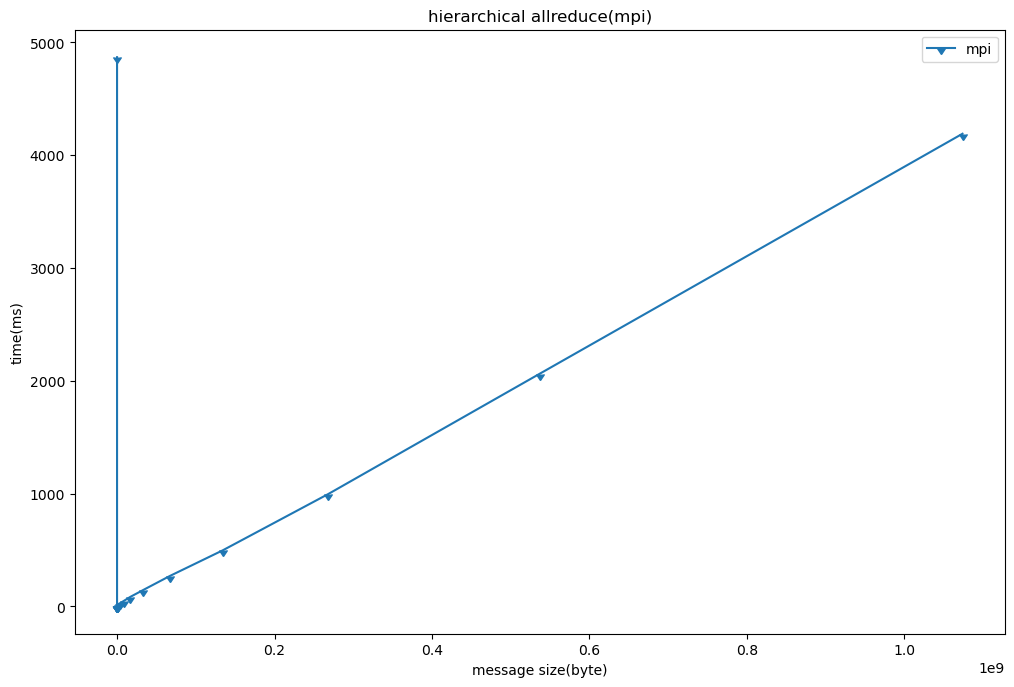

In [47]:

x1, y1 = read_hvd("./data/horovod-results/15gpu/10g-15gpu-mpi.txt")
# plt.plot(x,y, marker=11, label='h')
plt.plot(x1,y1, marker=11, label='mpi')
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('hierarchical allreduce(mpi)')
plt.show()

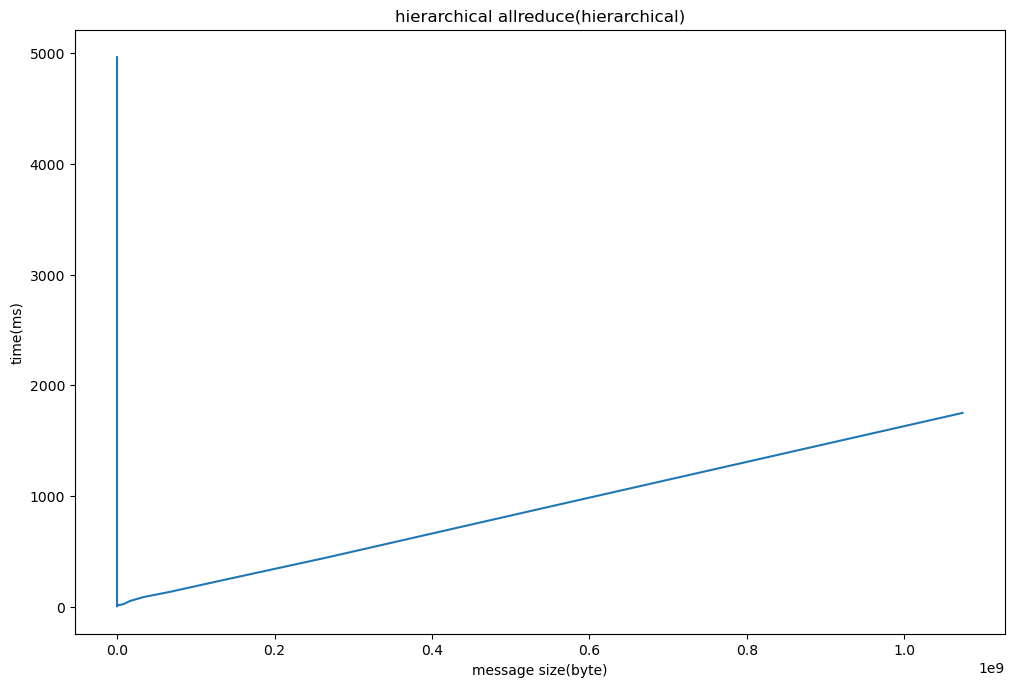

In [48]:

x2, y2 = read_hvd("./data/horovod-results/15gpu/10g-15gpu-h.txt")
plt.plot(x2,y2)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reduce+mpi_allreduce+nccl_bcast
plt.title('hierarchical allreduce(hierarchical)')
plt.show()

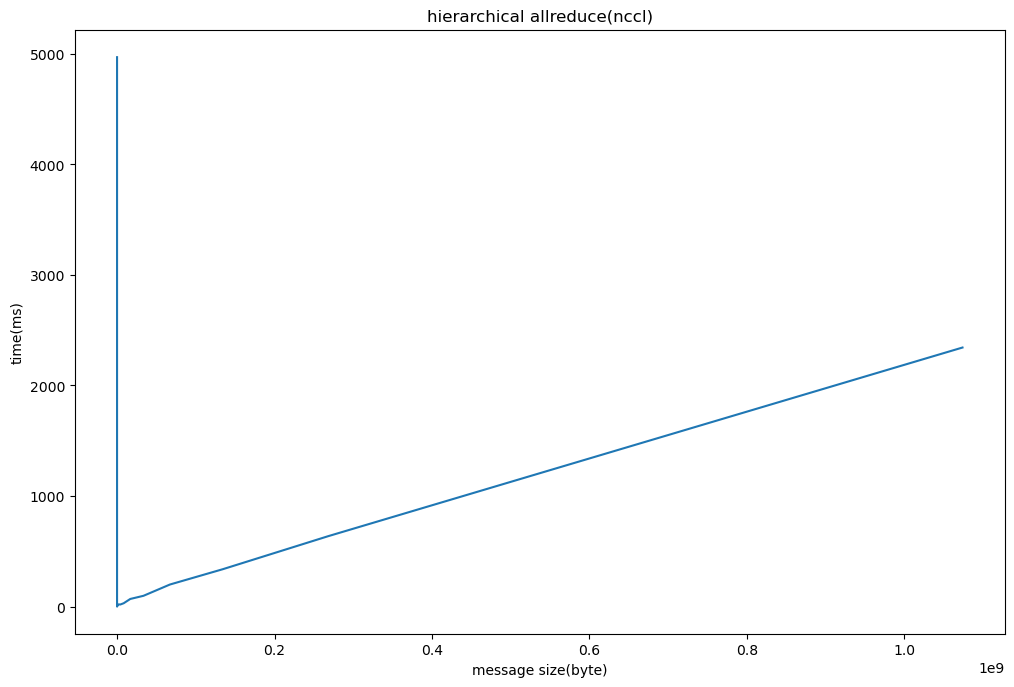

In [53]:
x3, y3 = read_hvd("./data/horovod-results/15gpu/10g-15gpu-nccl.txt")
plt.plot(x3,y3)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reduce+nccl_allreduce+nccl_bcast
plt.title('hierarchical allreduce(nccl)')
plt.show()

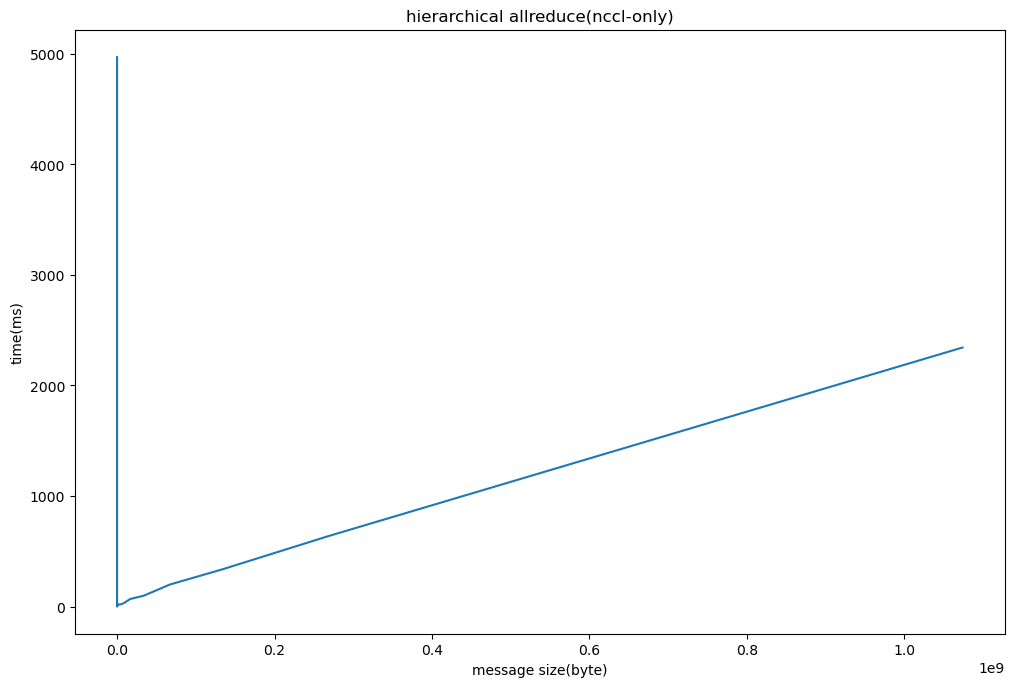

In [55]:
x4, y4 = read_hvd("./data/15gpu/10g-15gpu-nccl-only.txt")
plt.plot(x3,y3)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reduce+nccl_allreduce+nccl_bcast
plt.title('hierarchical allreduce(nccl-only)')
plt.show()

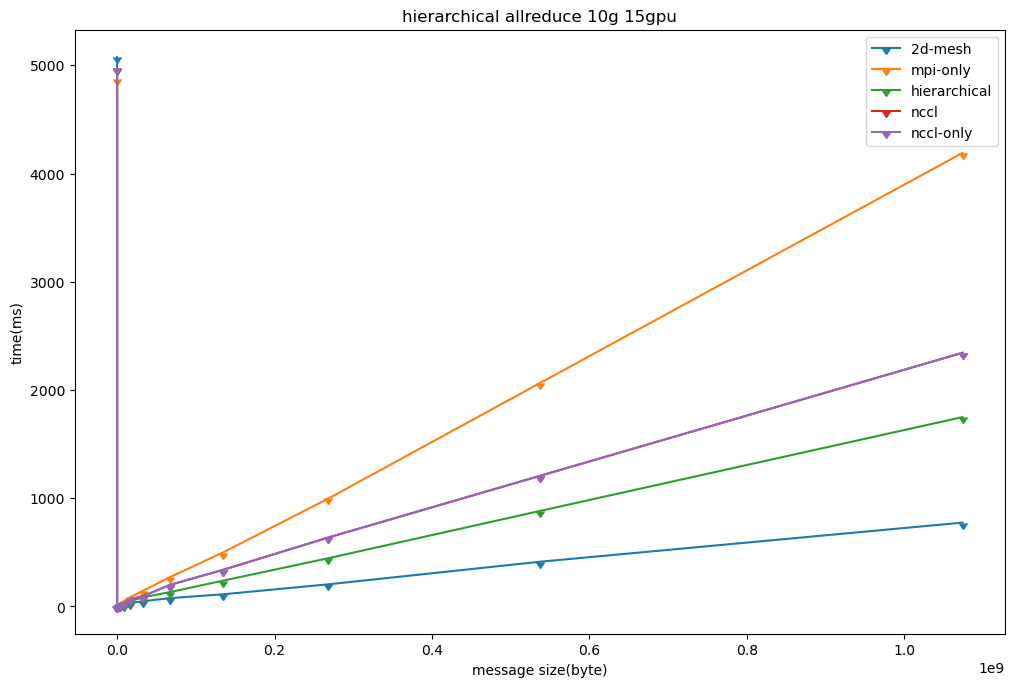

In [57]:
plt.plot(x,y, marker=11, label='2d-mesh')
plt.plot(x1,y1, marker=11, label='mpi-only')
plt.plot(x2,y2, marker=11, label='hierarchical')
plt.plot(x3,y3, marker=11, label='nccl')
plt.plot(x3,y3, marker=11, label='nccl-only')


plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('hierarchical allreduce 10g 15gpu')
plt.show()

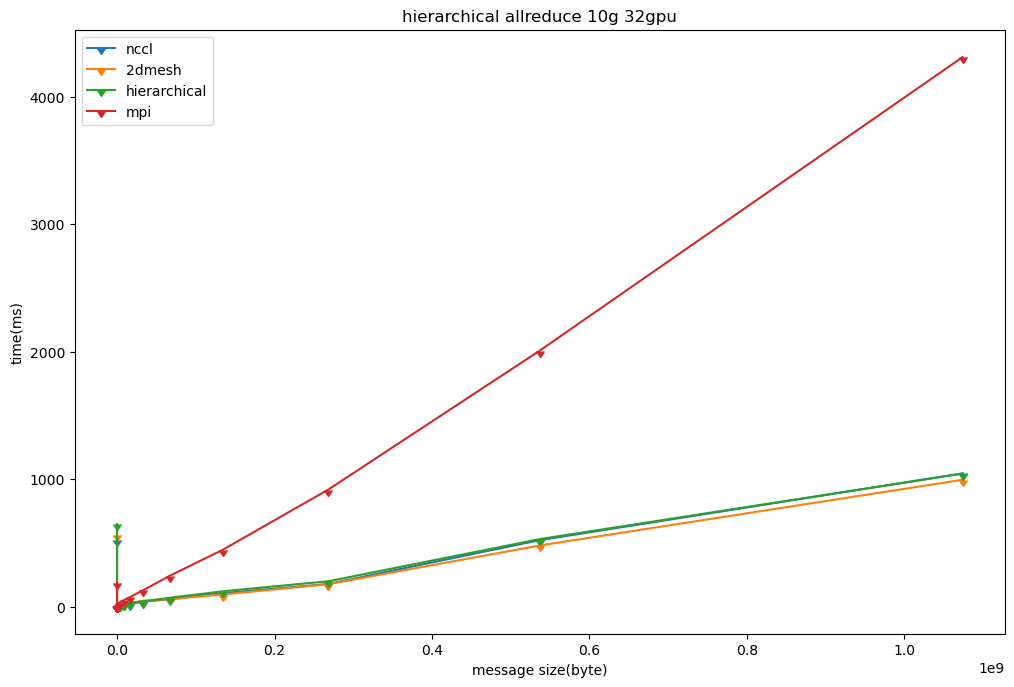

In [4]:
x1, y1 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl.txt")
# x2, y2 = read_hvd("./data/32gpu/10g-32gpu-nccl-only.txt")
x3, y3 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-2dmesh.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-h.txt")
x5, y5 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-mpi.txt")

plt.plot(x1,y1, marker=11, label='nccl')
# plt.plot(x2,y2, marker=11, label='nccl-only')
plt.plot(x3,y3, marker=11, label='2dmesh')
plt.plot(x4,y4, marker=11, label='hierarchical')
plt.plot(x5,y5, marker=11, label='mpi')

plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('hierarchical allreduce 10g 32gpu')
plt.show()

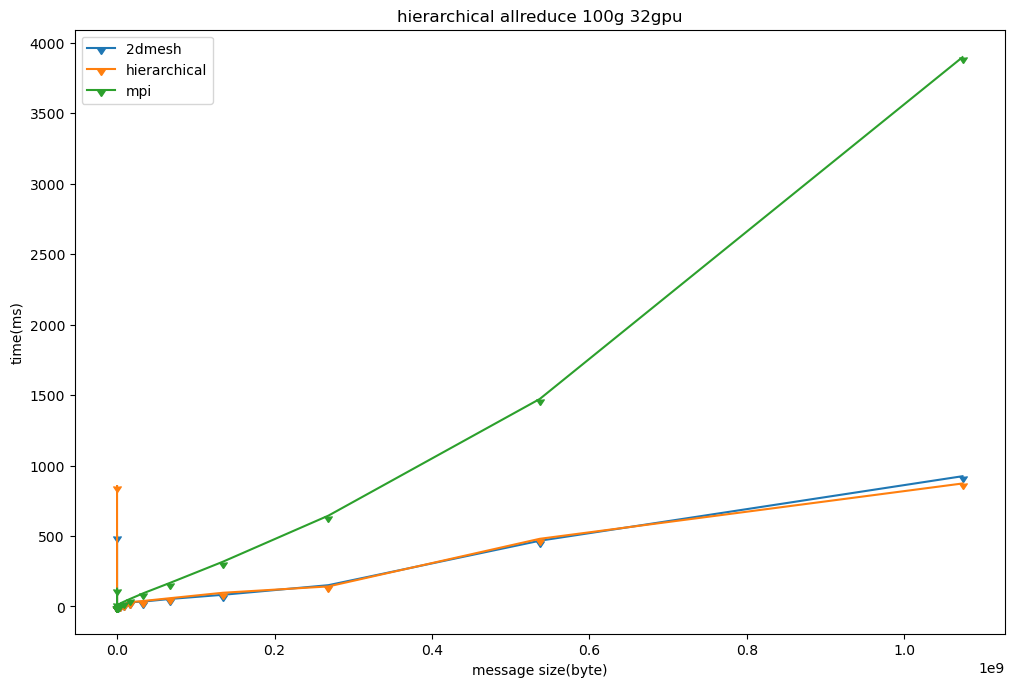

In [6]:
# x1, y1 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-nccl.txt")
# x2, y2 = read_hvd("./data/32gpu/10g-32gpu-nccl-only.txt")
x3, y3 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-2dmesh.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-h.txt")
x5, y5 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-mpi.txt")

# plt.plot(x1,y1, marker=11, label='nccl')
# plt.plot(x2,y2, marker=11, label='nccl-only')
plt.plot(x3,y3, marker=11, label='2dmesh')
plt.plot(x4,y4, marker=11, label='hierarchical')
plt.plot(x5,y5, marker=11, label='mpi')

plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('hierarchical allreduce 100g 32gpu')
plt.show()